In [1]:
# This code assumes TensorFlow 2.x is used
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

2024-09-20 21:33:05.563459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 1. Generate Data
# Prepare sine wave data
x = np.linspace(0, 100, 10000)
y = np.sin(x)

In [3]:
# Function to create sequences
def create_sequences(data, seq_len):
    xs = []
    ys = []
    for i in range(len(data) - seq_len):
        xs.append(data[i:(i + seq_len)])
        ys.append(data[i + seq_len])
    return np.array(xs), np.array(ys)

In [4]:

seq_length = 5


X, y = create_sequences(y, seq_length)


# Reshape X for RNN input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
# 2. Build the RNN model
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(seq_length, 1)),
    SimpleRNN(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mae')

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1414 - val_loss: 0.0268
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0174 - val_loss: 0.0062
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0142 - val_loss: 0.0048
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - val_loss: 0.0170
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0126 - val_loss: 0.0040


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


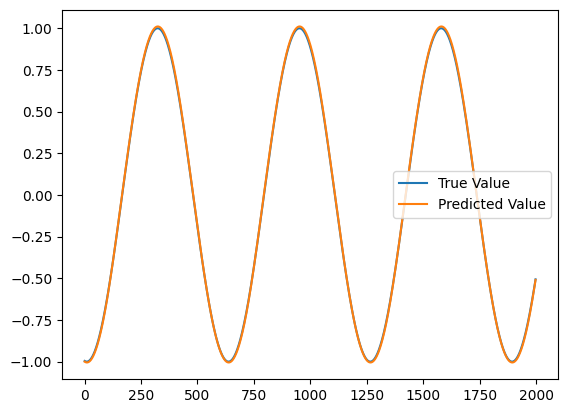

In [6]:
# 4. Evaluate
# Predict on the test data
predicted = model.predict(X_test)

# Plot the results
plt.plot(y_test, label='True Value')
plt.plot(predicted, label='Predicted Value')
plt.legend()
plt.show()